<a href="https://colab.research.google.com/github/2714830587-xh/CLRS-GG/blob/master/chapter7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install d2l

     |████████████████████████████████| 82 kB 571 kB/s 
     |████████████████████████████████| 11.2 MB 26.1 MB/s 
     |████████████████████████████████| 9.9 MB 35.5 MB/s 
     |████████████████████████████████| 61 kB 7.7 MB/s 
     |████████████████████████████████| 15.7 MB 35.2 MB/s 
     |████████████████████████████████| 930 kB 37.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's depende

In [2]:
!pip uninstall matplotlib
!pip install matplotlib==3.0.0

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.1
     |████████████████████████████████| 12.8 MB 4.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requi

# **AlexNET**

loss 0.330, train acc 0.879, test acc 0.883
416.7 examples/sec on cuda:0


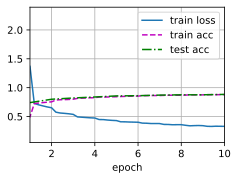

In [ ]:

import torch
import torch.nn as nn
from d2l import torch as d2l

net=nn.Sequential(
    nn.Conv2d(in_channels=1,out_channels=96,kernel_size=(11,11),stride=4,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(3,3),stride=2),
    nn.Conv2d(in_channels=96,out_channels=256,kernel_size=(5,5),padding=2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(3,3),stride=2),
    nn.Conv2d(256,384,(3,3),padding=1),
    nn.ReLU(),
    nn.Conv2d(384,384,(3,3),padding=1),
    nn.ReLU(),
    nn.Conv2d(384,256,(3,3),padding=1),
    nn.ReLU(),
    nn.MaxPool2d((3,3),stride=2),
    nn.ReLU(),
    nn.Flatten(),
    nn.ReLU(),
    nn.Linear(6400,4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096,4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096,10)
)


x=torch.randn(1,1,224,224)
for layer in net:
  x=layer(x)
  print(layer.__class__.__name__,"output shape:\t",x.shape)
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [ ]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
with torch.no_grad():
    n_sample=0
    n_correct=0
    n_class_correct=[0 for i in range(10)]
    n_class_sample=[0 for i in range(10)]
    for imgs,labels in  test_iter:
        imgs=imgs.to(device)
        
        labels=labels.to(device)
        
        output=net(imgs)
        _,pre_index=torch.max(output,1)
        n_correct+=(pre_index==labels).sum().item()
        n_sample+=len(labels)
        for i in range(len(pre_index)):
            if(pre_index[i]==labels[i]):
                n_class_correct[labels[i]]+=1
            n_class_sample[labels[i]]+=1
    print("acc",(n_correct/n_sample)*100)
    for i in range(10):
        acc=100*n_class_correct[i]/(n_class_sample[i])
        print(f"{text_labels[i]}   ,{acc}")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


acc 88.31
t-shirt   ,87.3
trouser   ,97.0
pullover   ,76.7
dress   ,91.3
coat   ,82.0
sandal   ,97.6
shirt   ,63.4
sneaker   ,94.5
bag   ,97.8
ankle boot   ,95.5


# **Pytorch 计算模型的FLOPs和参数量**

In [ ]:
!pip install pip install ptflops
from ptflops import get_model_complexity_info
model_name = 'AlexNet'
flops, params = get_model_complexity_info(net, (1, 224, 224), as_strings=True, 
print_per_layer_stat=True)#不用写batch_size大小，默认batch_size=1
print("%s |%s |%s" % (model_name, flops, params))


Sequential(
  46.76 M, 100.000% Params, 939.87 MMac, 100.000% MACs, 
  (0): Conv2d(11.71 k, 0.025% Params, 34.15 MMac, 3.634% MACs, 1, 96, kernel_size=(11, 11), stride=(4, 4), padding=(1, 1))
  (1): ReLU(0, 0.000% Params, 279.94 KMac, 0.030% MACs, )
  (2): MaxPool2d(0, 0.000% Params, 279.94 KMac, 0.030% MACs, kernel_size=(3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(614.66 k, 1.314% Params, 415.51 MMac, 44.209% MACs, 96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(0, 0.000% Params, 173.06 KMac, 0.018% MACs, )
  (5): MaxPool2d(0, 0.000% Params, 173.06 KMac, 0.018% MACs, kernel_size=(3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(885.12 k, 1.893% Params, 127.46 MMac, 13.561% MACs, 256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(0, 0.000% Params, 55.3 KMac, 0.006% MACs, )
  (8): Conv2d(1.33 M, 2.839% Params, 191.16 MMac, 20.339% MACs, 384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 

# **VGG**

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l


def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels,
                                kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)


conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    # 卷积层部分
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels

    return nn.Sequential(
        *conv_blks, nn.Flatten(),
        # 全连接层部分
        nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 10))

net = vgg(conv_arch)

X = torch.randn(size=(1, 1, 224, 224))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__,'output shape:\t',X.shape)

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


loss 0.174, train acc 0.935, test acc 0.925
709.6 examples/sec on cuda:0


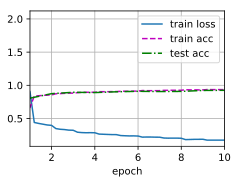

In [ ]:
# 由于VGG-11比AlexNet计算量更大，因此我们构建了一个通道数较少的网络，足够用于训练Fashion-MNIST数据集。
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)


lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

NiN

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l


def nin_block(in_channels, out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, strides, padding),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU())
    

net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, strides=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, strides=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, strides=1, padding=1),
    nn.MaxPool2d(3, stride=2),


    nn.Dropout(0.5),#这个的作用


    # 标签类别数是10
    nin_block(384, 10, kernel_size=3, strides=1, padding=1),
    nn.AdaptiveAvgPool2d((1, 1)),
    # 将四维的输出转成二维的输出，其形状为(批量大小,10)
    nn.Flatten())

In [ ]:
X = torch.rand(size=(1, 1, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


loss 0.353, train acc 0.868, test acc 0.850
1058.8 examples/sec on cuda:0


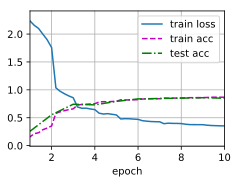

In [ ]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

# **GoogLeNet**
Inception->原文模型

In [ ]:
import torch
import torch.nn as nn
from d2l import torch as d2l


class Inception(nn.Module):
    def __init__(self,in_channels,c1,c2,c3,c4):
        super(Inception, self).__init__()
        self.conv1=nn.Sequential(nn.Conv2d(in_channels,c1,kernel_size=1),nn.ReLU())
        self.conv2=nn.Sequential(nn.Conv2d(in_channels,c2[0],kernel_size=1),nn.ReLU(),
                                 nn.Conv2d(c2[0],c2[1],kernel_size=3,padding=1))
        self.conv3=nn.Sequential(nn.Conv2d(in_channels,c3[0],kernel_size=1),nn.ReLU(),
                                nn.Conv2d(c3[0],c3[1],kernel_size=5,padding=2),nn.ReLU())
        self.conv4=nn.Sequential(nn.MaxPool2d(3,stride=1,padding=1),nn.Conv2d(in_channels,c4,kernel_size=1))
    def forward(self, x):
        return torch.cat(
            (self.conv1(x),self.conv2(x),self.conv3(x),self.conv4(x)),dim=1
        )
class GoogleNet(nn.Module):
  def __init__(self,in_channels,classes):
    super(GoogleNet,self).__init__()
    self.model = nn.Sequential(
              nn.Conv2d(in_channels,out_channels=64,kernel_size=7,stride=2,padding=3),nn.ReLU(),
              nn.MaxPool2d(kernel_size=3,stride=2,padding=1),
              nn.Conv2d(in_channels=64,out_channels=64,kernel_size=1),nn.ReLU(),
              nn.Conv2d(in_channels=64,out_channels=192,kernel_size=3,padding=1),nn.ReLU(),
              nn.MaxPool2d(kernel_size=3,stride=2,padding=1),
              Inception(192,c1=64,c2=[96,128],c3=[16,32],c4=32),
              Inception(256,c1=128,c2=[128,192],c3=[32,96],c4=64),
              nn.MaxPool2d(kernel_size=3,stride=2,padding=1),
              Inception(480,c1=192,c2=[96,208],c3=[16,48],c4=64),
              Inception(512,c1=160,c2=[112,224],c3=[24,64],c4=64),
              Inception(512,c1=128,c2=[128,256],c3=[24,64],c4=64),
              Inception(512,c1=112,c2=[144,288],c3=[32,64],c4=64),
              Inception(528,c1=256,c2=[160,320],c3=[32,128],c4=128),
              nn.MaxPool2d(kernel_size=3,stride=2,padding=1),
              Inception(832,c1=256,c2=[160,320],c3=[32,128],c4=128),
              Inception(832,c1=384,c2=[192,384],c3=[48,128],c4=128),
              nn.AvgPool2d(kernel_size=7,stride=1),
              nn.Dropout(p=0.4),
              nn.Flatten(),
              nn.Linear(1024,classes),
              nn.Softmax(dim=1)
            )
  def forward(self,X:torch.tensor):
    for layer in self.model:
      X = layer(X)
      print(layer.__class__.__name__,'output shape:',X.shape)
X = torch.randn(size=(1,3,224,224))
net = GoogleNet(3,1000)
net(X)

Conv2d output shape: torch.Size([1, 64, 112, 112])
ReLU output shape: torch.Size([1, 64, 112, 112])
MaxPool2d output shape: torch.Size([1, 64, 56, 56])
Conv2d output shape: torch.Size([1, 64, 56, 56])
ReLU output shape: torch.Size([1, 64, 56, 56])
Conv2d output shape: torch.Size([1, 192, 56, 56])
ReLU output shape: torch.Size([1, 192, 56, 56])
MaxPool2d output shape: torch.Size([1, 192, 28, 28])
Inception output shape: torch.Size([1, 256, 28, 28])
Inception output shape: torch.Size([1, 480, 28, 28])
MaxPool2d output shape: torch.Size([1, 480, 14, 14])
Inception output shape: torch.Size([1, 512, 14, 14])
Inception output shape: torch.Size([1, 512, 14, 14])
Inception output shape: torch.Size([1, 512, 14, 14])
Inception output shape: torch.Size([1, 528, 14, 14])
Inception output shape: torch.Size([1, 832, 14, 14])
MaxPool2d output shape: torch.Size([1, 832, 7, 7])
Inception output shape: torch.Size([1, 832, 7, 7])
Inception output shape: torch.Size([1, 1024, 7, 7])
AvgPool2d output shape:

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l


class Inception(nn.Module):
    # c1--c4是每条路径的输出通道数
    def __init__(self, in_channels, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # 线路1，单1x1卷积层
        self.p1_1 = nn.Conv2d(in_channels, c1, kernel_size=1)
        # 线路2，1x1卷积层后接3x3卷积层
        self.p2_1 = nn.Conv2d(in_channels, c2[0], kernel_size=1)
        self.p2_2 = nn.Conv2d(c2[0], c2[1], kernel_size=3, padding=1)
        # 线路3，1x1卷积层后接5x5卷积层
        self.p3_1 = nn.Conv2d(in_channels, c3[0], kernel_size=1)
        self.p3_2 = nn.Conv2d(c3[0], c3[1], kernel_size=5, padding=2)
        # 线路4，3x3最大汇聚层后接1x1卷积层
        self.p4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.p4_2 = nn.Conv2d(in_channels, c4, kernel_size=1)

    def forward(self, x):
        p1 = F.relu(self.p1_1(x))
        p2 = F.relu(self.p2_2(F.relu(self.p2_1(x))))
        p3 = F.relu(self.p3_2(F.relu(self.p3_1(x))))
        p4 = F.relu(self.p4_2(self.p4_1(x)))
        # 在通道维度上连结输出
        return torch.cat((p1, p2, p3, p4), dim=1)
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
b2 = nn.Sequential(nn.Conv2d(64, 64, kernel_size=1),
                   nn.ReLU(),
                   nn.Conv2d(64, 192, kernel_size=3, padding=1),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
b3 = nn.Sequential(Inception(192, 64, (96, 128), (16, 32), 32),
                   Inception(256, 128, (128, 192), (32, 96), 64),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
b4 = nn.Sequential(Inception(480, 192, (96, 208), (16, 48), 64),
                   Inception(512, 160, (112, 224), (24, 64), 64),
                   Inception(512, 128, (128, 256), (24, 64), 64),
                   Inception(512, 112, (144, 288), (32, 64), 64),
                   Inception(528, 256, (160, 320), (32, 128), 128),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
b5 = nn.Sequential(Inception(832, 256, (160, 320), (32, 128), 128),
                   Inception(832, 384, (192, 384), (48, 128), 128),
                   nn.AdaptiveAvgPool2d((1,1)),
                   nn.Flatten())

net = nn.Sequential(b1, b2, b3, b4, b5, nn.Linear(1024, 10))
X = torch.rand(size=(1, 1, 96, 96))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 12, 12])
Sequential output shape:	 torch.Size([1, 480, 6, 6])
Sequential output shape:	 torch.Size([1, 832, 3, 3])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


loss 0.291, train acc 0.890, test acc 0.883
957.1 examples/sec on cuda:0


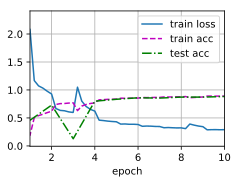

In [ ]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())


In [ ]:
!pip install pip install ptflops
from ptflops import get_model_complexity_info
model_name = 'GoogLeNet'
flops, params = get_model_complexity_info(net, (1, 224, 224), as_strings=True, 
print_per_layer_stat=True)#不用写batch_size大小，默认batch_size=1
print("%s |%s |%s" % (model_name, flops, params))

  Created wheel for ptflops: filename=ptflops-0.6.8-py3-none-any.whl size=11871 sha256=bfe536fd33d51c61caabc4d5085026cf21ef6ec49e4dbb943284f2dec7d12185
  Stored in directory: /root/.cache/pip/wheels/7c/ae/5f/74bef440471072ff2e39101cc9565460bfc17804f072bd7cff
Successfully built ptflops
Sequential(
  5.978 M, 100.000% Params, 1.511 GMac, 100.000% MACs, 
  (0): Sequential(
    0.003 M, 0.054% Params, 0.042 GMac, 2.763% MACs, 
    (0): Conv2d(0.003 M, 0.054% Params, 0.04 GMac, 2.657% MACs, 1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): ReLU(0.0 M, 0.000% Params, 0.001 GMac, 0.053% MACs, )
    (2): MaxPool2d(0.0 M, 0.000% Params, 0.001 GMac, 0.053% MACs, kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    0.115 M, 1.923% Params, 0.362 GMac, 23.953% MACs, 
    (0): Conv2d(0.004 M, 0.070% Params, 0.013 GMac, 0.864% MACs, 64, 64, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU(0.0 M, 0.000% Params, 0.0 GMac, 0.013% MACs, )
    (2): C

# **BN**

批量规范化层和暂退层一样，在训练模式和预测模式下计算不同。

批量规范化有许多有益的副作用，主要是正则化

在模型训练过程中，批量规范化利用小批量的均值和标准差，不断调整神经网络的中间输出，使整个神经网络各层的中间输出值更加稳定。

In [20]:
import torch
from torch import nn
from d2l import torch as d2l


def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # 通过is_grad_enabled来判断当前模式是训练模式还是预测模式
    if not torch.is_grad_enabled():
        # 如果是在预测模式下，直接使用传入的移动平均所得的均值和方差
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # 使用全连接层的情况，计算特征维上的均值和方差,
            # X的形状以便后面可以做广播运算
            mean = X.mean(dim=0,keepdim=True)
            var = ((X - mean) ** 2).mean(dim=0,keepdim=True)
        else:
            # 使用二维卷积层的情况，计算通道维上（axis=1）的均值和方差。
            # 这里我们需要保持X的形状以便后面可以做广播运算
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # 训练模式下，用当前的均值和方差做标准化
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # 更新移动平均的均值和方差
        moving_mean = momentum * moving_mean + (1.0 - momentum) * mean
        moving_var = momentum * moving_var + (1.0 - momentum) * var
    Y = gamma * X_hat + beta  # 缩放和移位
    return Y, moving_mean.data, moving_var.data
class BatchNorm(nn.Module):
    # num_features：完全连接层的输出数量或卷积层的输出通道数。
    # num_dims：2表示完全连接层，4表示卷积层
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # 参与求梯度和迭代的拉伸和偏移参数，分别初始化成1和0
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # 非模型参数的变量初始化为0和1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        # 如果X不在内存上，将moving_mean和moving_var
        # 复制到X所在显存上
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # 保存更新过的moving_mean和moving_var
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.9)
        return Y

In [21]:
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5), BatchNorm(6, num_dims=4), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), BatchNorm(16, num_dims=4), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2), nn.Flatten(),
    nn.Linear(16*4*4, 120), BatchNorm(120, num_dims=2), nn.Sigmoid(),
    nn.Linear(120, 84), BatchNorm(84, num_dims=2), nn.Sigmoid(),
    nn.Linear(84, 10))
x=torch.randn(1,1,28,28)
for layer in net:
  x=layer(x)
  print(layer.__class__.__name__,"out shape",x.shape)

Conv2d out shape torch.Size([1, 6, 24, 24])
BatchNorm out shape torch.Size([1, 6, 24, 24])
Sigmoid out shape torch.Size([1, 6, 24, 24])
AvgPool2d out shape torch.Size([1, 6, 12, 12])
Conv2d out shape torch.Size([1, 16, 8, 8])
BatchNorm out shape torch.Size([1, 16, 8, 8])
Sigmoid out shape torch.Size([1, 16, 8, 8])
AvgPool2d out shape torch.Size([1, 16, 4, 4])
Flatten out shape torch.Size([1, 256])
Linear out shape torch.Size([1, 120])
BatchNorm out shape torch.Size([1, 120])
Sigmoid out shape torch.Size([1, 120])
Linear out shape torch.Size([1, 84])
BatchNorm out shape torch.Size([1, 84])
Sigmoid out shape torch.Size([1, 84])
Linear out shape torch.Size([1, 10])


loss 0.080, train acc 0.973, test acc 0.885
35968.0 examples/sec on cuda:0


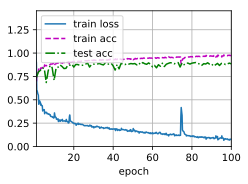

In [25]:
lr, num_epochs, batch_size = 1.0, 100, 1024
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [23]:
net[1].gamma.reshape((-1,)), net[1].beta.reshape((-1,))

(tensor([1.9317, 2.3454, 3.4871, 0.9684, 3.2017, 3.7369], device='cuda:0',
        grad_fn=<ReshapeAliasBackward0>),
 tensor([ 0.6920, -2.7394, -1.5700, -1.0655,  3.3486,  1.4963], device='cuda:0',
        grad_fn=<ReshapeAliasBackward0>))

框架中BatchNorm不用定义num_dims维度

loss 0.262, train acc 0.903, test acc 0.780
18945.0 examples/sec on cuda:0


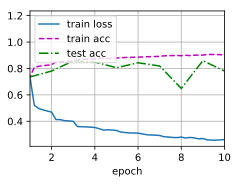

In [24]:
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5), nn.BatchNorm2d(6), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.BatchNorm2d(16), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2), nn.Flatten(),
    nn.Linear(256, 120), nn.BatchNorm1d(120), nn.Sigmoid(),
    nn.Linear(120, 84), nn.BatchNorm1d(84), nn.Sigmoid(),
    nn.Linear(84, 10))
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

# **ResNet**

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from d2l import torch as d2l
class Resdidual(nn.Module):
    def __init__(self,in_channels,num_channels,use1x1con=False,stride=1):
        super(Resdidual, self).__init__()
        self.conv1=nn.Conv2d(in_channels,num_channels,kernel_size=3,stride=stride,padding=1)
        self.conv2=nn.Conv2d(num_channels,num_channels,kernel_size=3,padding=1)
        if use1x1con:
            self.conv3=nn.Conv2d(in_channels,num_channels,kernel_size=1,stride=stride)
        else:
            self.conv3=None
        self.bn1=nn.BatchNorm2d(num_channels)
        self.bn2=nn.BatchNorm2d(num_channels)
    def forward(self, x):
        y=F.relu(self.bn1(self.conv1(x)))
        y=self.bn2(self.conv2(y))
        if self.conv3:
            x=self.conv3(x)
        y=F.relu(y+x)
        return y

x=torch.randn(size=(4,3,6,6))
res=Resdidual(3,3)
print(res(x).shape)

torch.Size([4, 3, 6, 6])
torch.Size([4, 3, 6, 6])


In [3]:
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
                   nn.BatchNorm2d(64), nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [4]:
def resnet_block(in_channels,num_channels,num_resduals,first_block=False):
  blk=[]
  for i in range(num_resduals):
    if i==0 and not first_block:
      blk.append(Resdidual(in_channels,num_channels,use1x1con=True,stride=1))
    else:
      blk.append(Resdidual(num_channels,num_channels))
  return blk
b2 = nn.Sequential(*resnet_block(64, 64, 2, first_block=True))
b3 = nn.Sequential(*resnet_block(64, 128, 2))
b4 = nn.Sequential(*resnet_block(128, 256, 2))
b5 = nn.Sequential(*resnet_block(256, 512, 2))
net = nn.Sequential(b1, b2, b3, b4, b5,
                    nn.AdaptiveAvgPool2d((1,1)),
                    nn.Flatten(), nn.Linear(512, 10))

X = torch.rand(size=(1, 1, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 56, 56])
Sequential output shape:	 torch.Size([1, 64, 56, 56])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 56, 56])
Sequential output shape:	 torch.Size([1, 512, 56, 56])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 512, 1, 1])
Flatten output shape:	 torch.Size([1, 512])
Linear output shape:	 torch.Size([1, 10])


loss 0.144, train acc 0.948, test acc 0.875
165.3 examples/sec on cuda:0


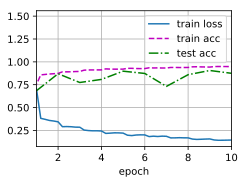

In [5]:



lr, num_epochs, batch_size = 0.05, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [5]:
!pip install pip install ptflops
from ptflops import get_model_complexity_info
model_name = 'ResNet'
flops, params = get_model_complexity_info(net, (1, 224, 224), as_strings=True, 
print_per_layer_stat=True)#不用写batch_size大小，默认batch_size=1
print("%s |%s |%s" % (model_name, flops, params))

  Created wheel for ptflops: filename=ptflops-0.6.8-py3-none-any.whl size=11871 sha256=25e207468d845130cc6337b2dbf2ce9183bbcea44239dd616535acff1d5ee945
  Stored in directory: /root/.cache/pip/wheels/7c/ae/5f/74bef440471072ff2e39101cc9565460bfc17804f072bd7cff
Successfully built ptflops
Sequential(
  11.178 M, 100.000% Params, 35.074 GMac, 100.000% MACs, 
  (0): Sequential(
    0.003 M, 0.030% Params, 0.043 GMac, 0.124% MACs, 
    (0): Conv2d(0.003 M, 0.029% Params, 0.04 GMac, 0.114% MACs, 1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): BatchNorm2d(0.0 M, 0.001% Params, 0.002 GMac, 0.005% MACs, 64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(0.0 M, 0.000% Params, 0.001 GMac, 0.002% MACs, )
    (3): MaxPool2d(0.0 M, 0.000% Params, 0.001 GMac, 0.002% MACs, kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    0.148 M, 1.326% Params, 0.465 GMac, 1.325% MACs, 
    (0): Resdidual(
      0.074 M, 0.663% 

# **DenseNet**

In [2]:
import torch
from torch import nn
from d2l import torch as d2l


def conv_block(input_channels, num_channels):
    return nn.Sequential(
        nn.BatchNorm2d(input_channels), nn.ReLU(),
        nn.Conv2d(input_channels, num_channels, kernel_size=3, padding=1))
# 一个稠密块由多个卷积块组成，每个卷积块使用相同数量的输出通道。
# 然而，在前向传播中，我们将每个卷积块的输入和输出在通道维上连结。
class DenseBlock(nn.Module):
    def __init__(self, num_convs, input_channels, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block(
                num_channels * i + input_channels, num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # 连接通道维度上每个块的输入和输出
            X = torch.cat((X, Y), dim=1)
        return X

In [3]:
blk = DenseBlock(2, 3, 10)
X = torch.randn(4, 3, 8, 8)
Y = blk(X)
Y.shape

torch.Size([4, 23, 8, 8])

In [4]:
def transition_block(input_channels, num_channels):
    return nn.Sequential(
        nn.BatchNorm2d(input_channels), nn.ReLU(),
        nn.Conv2d(input_channels, num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))
blk = transition_block(23, 10)
blk(Y).shape

torch.Size([4, 10, 4, 4])

In [6]:
b1 = nn.Sequential(
    nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
    nn.BatchNorm2d(64), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
# num_channels为当前的通道数
num_channels, growth_rate = 64, 32
num_convs_in_dense_blocks = [4, 4, 4, 4]
blks = []
for i, num_convs in enumerate(num_convs_in_dense_blocks):
    blks.append(DenseBlock(num_convs, num_channels, growth_rate))
    # 上一个稠密块的输出通道数
    num_channels += num_convs * growth_rate
    # 在稠密块之间添加一个转换层，使通道数量减半
    if i != len(num_convs_in_dense_blocks) - 1:
        blks.append(transition_block(num_channels, num_channels // 2))
        num_channels = num_channels // 2
net = nn.Sequential(
    b1, *blks,
    nn.BatchNorm2d(num_channels), nn.ReLU(),
    nn.AdaptiveAvgPool2d((1, 1)),
    nn.Flatten(),
    nn.Linear(num_channels, 10))
x=torch.randn(size=(1,1,96,96))
for layer in net:
  x=layer(x)
  print(layer.__class__.__name__,"out shape",x.shape)

Sequential out shape torch.Size([1, 64, 24, 24])
DenseBlock out shape torch.Size([1, 192, 24, 24])
Sequential out shape torch.Size([1, 96, 12, 12])
DenseBlock out shape torch.Size([1, 224, 12, 12])
Sequential out shape torch.Size([1, 112, 6, 6])
DenseBlock out shape torch.Size([1, 240, 6, 6])
Sequential out shape torch.Size([1, 120, 3, 3])
DenseBlock out shape torch.Size([1, 248, 3, 3])
BatchNorm2d out shape torch.Size([1, 248, 3, 3])
ReLU out shape torch.Size([1, 248, 3, 3])
AdaptiveAvgPool2d out shape torch.Size([1, 248, 1, 1])
Flatten out shape torch.Size([1, 248])
Linear out shape torch.Size([1, 10])


loss 0.145, train acc 0.947, test acc 0.899
809.6 examples/sec on cuda:0


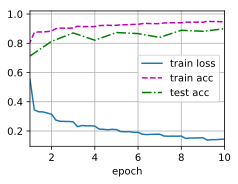

In [7]:
lr, num_epochs, batch_size = 0.1, 10, 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [8]:
!pip install pip install ptflops
from ptflops import get_model_complexity_info
model_name = 'DenseNet'
flops, params = get_model_complexity_info(net, (1, 224, 224), as_strings=True, 
print_per_layer_stat=True)#不用写batch_size大小，默认batch_size=1
print("%s |%s |%s" % (model_name, flops, params))

  Created wheel for ptflops: filename=ptflops-0.6.8-py3-none-any.whl size=11871 sha256=603b7c6da9e4d5f86f366de95a7f9502b70b6509c40953ff40a9a212755da529
  Stored in directory: /root/.cache/pip/wheels/7c/ae/5f/74bef440471072ff2e39101cc9565460bfc17804f072bd7cff
Successfully built ptflops
Sequential(
  0.758 M, 100.000% Params, 0.717 GMac, 100.000% MACs, 
  (0): Sequential(
    0.003 M, 0.439% Params, 0.043 GMac, 6.049% MACs, 
    (0): Conv2d(0.003 M, 0.422% Params, 0.04 GMac, 5.601% MACs, 1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): BatchNorm2d(0.0 M, 0.017% Params, 0.002 GMac, 0.224% MACs, 64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(0.0 M, 0.000% Params, 0.001 GMac, 0.112% MACs, )
    (3): MaxPool2d(0.0 M, 0.000% Params, 0.001 GMac, 0.112% MACs, kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (1): DenseBlock(
    0.13 M, 17.152% Params, 0.409 GMac, 57.101% MACs, 
    (net): Sequential(
      0.13 M, 17.152